In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import os

for dirname, _, filenames in os.walk('./modified_inputs/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./modified_inputs/no_missing_train.csv
./modified_inputs/no_missing_training_extra.csv


In [2]:
no_missing = pd.read_csv("./modified_inputs/no_missing_train.csv")
target = no_missing['Price']
no_missing.drop("Price", axis=1, inplace=True)
no_missing

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338
...,...,...,...,...,...,...,...,...,...,...
246681,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812
246682,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182
246683,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250
246684,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738


In [3]:
# Encoding the data
for i in no_missing:
    if i != "Compartments" and i != "Weight Capacity (kg)":
        no_missing[i] = LabelEncoder().fit_transform(no_missing[i])

no_missing

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,0,1,1,1,7.0,1,0,2,0,11.611723
1,1,1,0,2,10.0,1,1,1,3,27.078537
2,2,4,1,2,2.0,1,0,1,5,16.643760
3,3,2,2,2,8.0,1,0,1,3,12.937220
4,4,0,0,1,1.0,1,1,1,3,17.749338
...,...,...,...,...,...,...,...,...,...,...
246681,246681,0,1,2,9.0,0,0,2,1,12.730812
246682,246682,1,1,0,6.0,0,1,2,1,26.633182
246683,246683,3,0,0,9.0,1,1,0,4,11.898250
246684,246684,0,2,2,1.0,0,1,2,4,6.175738


In [4]:
no_missing.drop("id", axis=1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaler.fit(no_missing)
scaled_data = scaler.transform(no_missing)
scaled_data

array([[-0.69931374, -0.4928208 ,  0.02206268, ...,  1.22338265,
        -1.4867244 , -0.91959901],
       [-0.69931374, -1.38398693,  1.26097809, ..., -0.01088741,
         0.28357779,  1.30109828],
       [ 1.39982729, -0.4928208 ,  1.26097809, ..., -0.01088741,
         1.46377925, -0.19710817],
       ...,
       [ 0.70011362, -1.38398693, -1.21685273, ..., -1.24515747,
         0.87367852, -0.87845999],
       [-1.39902741,  0.39834533,  1.26097809, ...,  1.22338265,
         0.87367852, -1.70008793],
       [ 1.39982729, -1.38398693,  1.26097809, ..., -1.24515747,
        -1.4867244 ,  0.07929494]])

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

In [6]:
# Create a XGBoost Classifier
clf = XGBRegressor(n_estimators=10000, learning_rate=0.001, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
r2 = r2_score(y_test, predictions)
squared_error = root_mean_squared_error(y_test, predictions)
print(squared_error)
predictions

38.8634753336258


array([82.834816, 80.085464, 83.48344 , ..., 82.82065 , 81.15301 ,
       81.967445], dtype=float32)

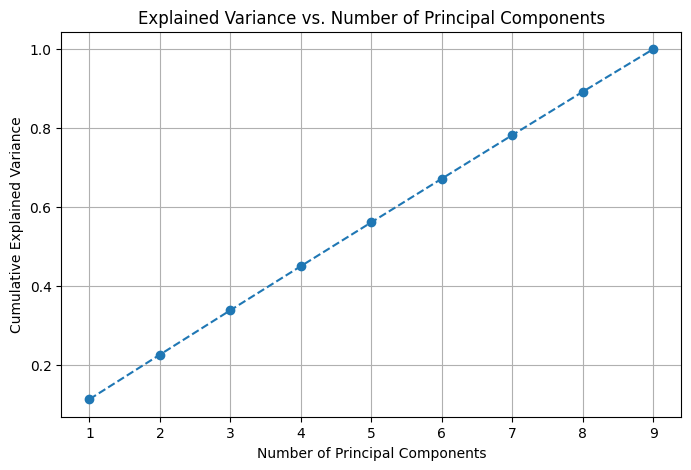

Explained Variance Ratios: [0.11435118 0.11277656 0.11238461 0.11149622 0.11089533 0.11043414
 0.11017635 0.10971668 0.10776894]
Cumulative Variance: [0.11435118 0.22712774 0.33951235 0.45100857 0.5619039  0.67233803
 0.78251438 0.89223106 1.        ]


In [7]:
# Introducing PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

In [8]:
pca.transform(scaled_data)

array([[ 1.28691742,  0.53866849, -1.67811923, ..., -0.75292347,
         1.02299224,  0.18299775],
       [ 0.00791969,  0.24153261, -0.48315153, ..., -0.19912369,
        -1.84691893,  1.56400255],
       [ 1.35527315, -1.53062991,  1.06010516, ..., -0.50590702,
        -1.16443558, -0.18215877],
       ...,
       [ 0.00721947, -0.23094757, -1.31043711, ...,  1.53666717,
        -1.31565367,  1.66719289],
       [-1.46064919, -1.62621722,  0.18538008, ..., -1.24716283,
         1.78386643,  0.09043892],
       [-1.69689424, -1.48302309,  0.03299567, ..., -0.41222717,
        -1.10958036, -0.24220949]])

In [9]:
X_pca = pca.transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [10]:
# Create a XGBoost Classifier
clf = XGBRegressor(n_estimators=10000, learning_rate=0.001, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
squared_error = root_mean_squared_error(y_test, predictions)
print(squared_error)
predictions

38.89524275087636


array([82.730194, 80.30338 , 81.77886 , ..., 82.02585 , 81.72177 ,
       82.70141 ], dtype=float32)

In [11]:
%store -r data
data

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,1.0,1.0,1.0,7.0,1.0,0.0,2.0,0.0,11.611723
1,1.0,0.0,2.0,10.0,1.0,1.0,1.0,3.0,27.078537
2,4.0,1.0,2.0,2.0,1.0,0.0,1.0,5.0,16.643760
3,2.0,2.0,2.0,8.0,1.0,0.0,1.0,3.0,12.937220
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,17.749338
...,...,...,...,...,...,...,...,...,...
299995,0.0,1.0,2.0,9.0,0.0,0.0,2.0,1.0,12.730812
299996,1.0,1.0,0.0,6.0,0.0,1.0,2.0,1.0,26.633182
299997,3.0,0.0,0.0,9.0,1.0,1.0,0.0,4.0,11.898250
299998,0.0,2.0,2.0,1.0,0.0,1.0,2.0,4.0,6.175738


In [12]:
target = pd.read_csv("./inputs/train.csv")["Price"]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [13]:
# Create a XGBoost Classifier
clf = XGBRegressor(n_estimators=10000, learning_rate=0.001, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
squared_error = root_mean_squared_error(y_test, predictions)
print(squared_error)
predictions

38.90907064043951


array([81.59764 , 83.060326, 81.938286, ..., 81.66943 , 83.16279 ,
       83.10864 ], dtype=float32)

In [ ]:
parameters = {
    "n_estimators": [100, 1000, 10000],
    "learning_rate": [0.001, 0.01, 0.1, 1.0],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "random_state": [21, 42, 34, 50]
}
model = XGBRegressor()
grid = GridSearchCV(model, parameters, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
